# Homework 2

Alberto Quaini

### Import libraries

In [2]:
import numpy as np
from numpy import random as rand
from scipy.stats import norm, gaussian_kde, beta
import matplotlib as mplot
import matplotlib.pyplot as plt


## Exercise 1

### Class definition

In [3]:
class KDE(object):

    def __init__(self, X, bandwith=None):
        
        self.X = X
        self.n = X.size
        if not bandwith:
            # Silverman's optimal bandwidth
            self.h = self.silverman()
        else:
            self.h = bandwith
            
    def silverman(self):
        '''Silverman's rule for optimal bandwith'''
        
        return 1.06 * self.n**(-1 / 5) * np.sqrt(np.var(self.X))
    
    def fhat(self, x):
        
        K = norm.pdf( (x - self.X) / self.h )
        val = (1 / (self.h * self.n)) * K.sum()
        return val
    
    def density(self, grid = np.linspace(0, 1, 1000)):
        
        density = np.empty_like(grid)
        for i,n in enumerate(grid):
            density[i] = self.fhat(n)
        return density

### Plot

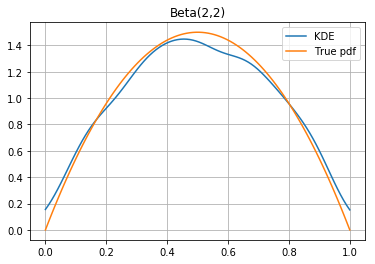

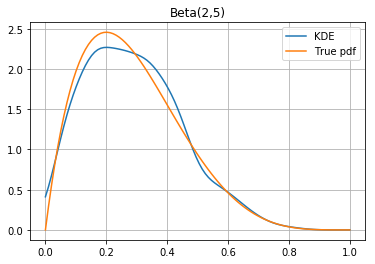

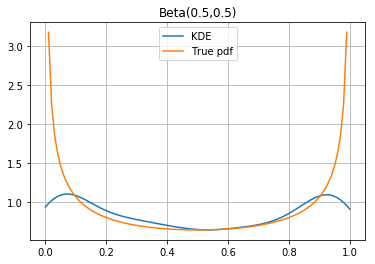

In [4]:
n = 1000
grid = np.linspace(0, 1, 100)

# first dataset
alpha1 = 2
beta1 = 2
X1 = np.random.beta(alpha1, beta1, size = (n, 1))
kde1 = KDE(X1)
estimate1 = kde1.density(grid = grid)
# plot
plt.plot(grid, estimate1, label='KDE')
plt.plot(grid, beta.pdf(grid, alpha1, beta1), label='True pdf')
plt.grid(True)
plt.title('Beta(2,2)')
plt.legend()
plt.show()

# second dataset
alpha2 = 2
beta2 = 5
X2 = np.random.beta(alpha2, beta2, size=(n, 1))
kde2 = KDE(X2)
estimate2 = kde2.density(grid = grid)
# plot
plt.plot(grid, estimate2, label='KDE')
plt.plot(grid, beta.pdf(grid, alpha2, beta2), label='True pdf')
plt.grid(True)
plt.title('Beta(2,5)')
plt.legend()
plt.show()

# third dataset
alpha3 = 0.5
beta3 = 0.5
X3 = np.random.beta(alpha3, beta3, size=(n, 1))
kde3 = KDE(X3)
estimate3 = kde3.density(grid = grid)
# plot
plt.plot(grid, estimate3, label='KDE')
plt.plot(grid, beta.pdf(grid, 0.5, 0.5), label='True pdf')
plt.grid(True)
plt.title('Beta(0.5,0.5)')
plt.legend()
plt.show()



#### COMMENT ####

# and beta(2,2) and beta(2,5) seem fairly accurate,similar.
# beta(0.5,0.5) was less accurate maybe because of small sample size


### Comment

The kernel density estimator is a good nonparametric estimator of "well behaving" distributions like Beta(2,2) and Beta(2,5), where most of the probability density concentrate along the middle values. 

Given the definition of the kernel density estimator, the values of the density at the extreme values have little importance in the estimation as opposed to the values of the density at the center. Therefore, a bimodal distribution like Beta(0.5,0.5), where the modes happen at the two extrema, can be underestimated in the tails.

## Exercise 2

### Parameters initialization

In [5]:
rho = 0.9
b = 0.0
sigma = 0.1
mu = -3
s = 0.2

In [6]:
def myPlot():
    # generate grid time t
    grid = np.linspace(mu - 3*s, mu + 3*s, 1000)
    # compute psi t
    psi = mplot.mlab.normpdf(grid, mu, s)
    # compute sd and mu 
    s1 = np.sqrt(rho ** 2 * s ** 2 + sigma ** 2)
    mu1 = rho * mu + b
    
    # generate grid time t+1
    grid1 = np.linspace(mu1 - 3 * s1, mu1 + 3 * s1)
    # compute psi t+1
    psi1 = mplot.mlab.normpdf(grid1, mu1, s1)
    # start plot
    plt.plot(grid, psi, 'b' , lw = 2, label = "$\psi_{t}$")
    plt.plot(grid1, psi1, 'r', lw = 2, label = "$\psi_{t + 1}$")
    return grid1

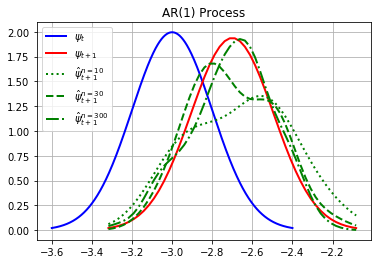

In [12]:
grid1 = myPlot()
# estimate psi t+1 for n = 10
n = 10
xi = rand.normal(0, 1, n)
draws = rand.normal(mu, s, n)
draws1 = rho * draws + b + sigma * xi
density_est = KDE(draws1)
output = density_est.density(grid1)
plt.plot(grid1, output, 'g:' , lw = 2, label = "$\hat{\psi}_{t + 1}^{n=10}$")

# estimate psi t+1 for n = 30
n = 30
xi = np.random.normal(0, 1, n)
draws = rand.normal(mu, s, n)
draws1 = rho * draws + b + sigma * xi
density_est = KDE(draws1)
output = density_est.density(grid1)
plt.plot(grid1, output, 'g--' , lw = 2, label = "$\hat{\psi}_{t + 1}^{n=30}$")

# estimate psi t+1 for n = 300
n = 300
xi = rand.normal(0, 1, n)
draws = rand.normal(mu, s, n)
draws1 = rho * draws + b + sigma * xi
density_est = KDE(draws1)
output = density_est.density(grid1)
plt.plot(grid1, output, 'g-.' , lw = 2, label = "$\hat{\psi}_{t + 1}^{n=300}$")
plt.legend(loc= "upper left")
plt.title("AR(1) Process")
plt.grid(True)
plt.show()

### Comment

The simulated based estimate of $\psi_{t+1}$ seem to converges to the theoretical distribution.

## Exercise 3

Let $A\in\mathbb M_{nxn}$ with spectral radius $r(A)<1$.
Take an arbitrary $\epsilon$ satisfying $0<\epsilon<1-r(A)$. 
By Gelfand's formula we know that there exists a $K(\epsilon)\in\mathbb N$ such that for any $k\geq K(\epsilon)$ we have 
$$(r(A)-\epsilon)^k<||A^k||<(r(A)+\epsilon)^k.$$

Since $||A^k||\geq 0$, we can rewrite the previous inequalities as
$$0<||A^k||<(r(A)+\epsilon)^k.$$
By our choice of $\epsilon$ we know that 
$(r(A)+\epsilon)^k\to 0$ as $k\to\infty$.
Therefore $||A^k||\to 0$ as $k\to\infty$.